# Prose baseline

To speed up computation, we preprocess and pickle the source prose corpus once:

In [ ]:
from src.baseline import preprocess_and_cache_prose_corpus
from src.prose import anabasis

cache = preprocess_and_cache_prose_corpus(
    anabasis,
    cache_file="data/cached_prose_corpus.pkl",)

1) Make the scanned baselines

In [ ]:
from tqdm import tqdm

from src.utils.utils import get_canticum_ids
from heatmaps import canticum_with_at_least_two_strophes

from src.baseline import make_prose_baseline_fast

###### SETTINGS #######

responding_unit = "triads"  # "triads", "strophes"

#######################

#for collection in ["olympians", "pythians", "nemeans", "isthmians"]:
for collection in ["olympians"]:

    xml_path = f"data/compiled/{responding_unit}/ht_{collection}_{responding_unit}.xml"
    
    responsion_attributes = get_canticum_ids(xml_path)
    print(f"Canticum IDs in {collection}: {responsion_attributes}")

    for responsion_attribute in tqdm(responsion_attributes):
        if not canticum_with_at_least_two_strophes(xml_path, responsion_attribute):
            print(f"Skipping {responsion_attribute} in {collection} (less than 2 strophes).")
            continue
        make_prose_baseline_fast(xml_path, responsion_attribute)


Canticum IDs in olympians: ['ol01', 'ol02', 'ol03', 'ol04', 'ol05', 'ol06', 'ol07', 'ol08', 'ol09', 'ol10', 'ol11', 'ol12', 'ol13', 'ol14']


  0%|          | 0/14 [00:00<?, ?it/s]


KeyboardInterrupt: 

2. Compile the scanned baselines

In [ ]:
import os

from src.compile import process_file

###### SETTINGS #######

baseline_scan_dir = "data/scan/baselines/triads/prose/"
baseline_compiled_dir = "data/compiled/baselines/triads/prose/"

#######################

baseline_xmls = os.listdir(baseline_scan_dir)

for baseline_xml in baseline_xmls:
    if not baseline_xml.endswith(".xml"):
        continue
    infile = os.path.join(baseline_scan_dir, baseline_xml)
    outfile = os.path.join(baseline_compiled_dir, baseline_xml)
    process_file(infile, outfile)

In [ ]:
from src.stats_comp import compatibility_corpus, compatibility_ratios_to_stats

all_comp_ratios_bl = compatibility_corpus('data/compiled/baselines/triads/prose')
corpus_comp_stat_bl = compatibility_ratios_to_stats(all_comp_ratios_bl)
print(corpus_comp_stat_bl)

all_comp_ratios = compatibility_corpus('data/compiled/triads/')
corpus_comp_stat = compatibility_ratios_to_stats(all_comp_ratios)
print(corpus_comp_stat)

0.7499381999091583
0.7789296914527603


3. Make heatmaps

  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is08...
Length of each row (data matrix): [20, 14, 7, 16, 20, 12, 12, 12, 18, 13, 9, 16]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py08...
Length of each row (data matrix): [9, 9, 7, 10, 14, 14, 10, 9, 9, 7, 10, 14, 14, 10, 14, 14, 15, 13, 16, 14]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py09...
Length of each row (data matrix): [12, 9, 12, 16, 23, 15, 9, 14, 16, 12, 9, 12, 16, 23, 15, 9, 14, 16, 12, 23, 15, 8, 15, 11, 19, 7, 12]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne08...
Length of each row (data matrix): [19, 16, 19, 18, 15, 19, 16, 19, 18, 15, 15, 11, 18, 10, 14, 20, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol09...
Length of each row (data matrix): [8, 18, 14, 14, 14, 15, 8, 6, 10, 14, 8, 18, 14, 14, 14, 15, 8, 6, 10, 14, 8, 10, 7, 11, 8, 11, 12, 21]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol08...
Length of each row (data matrix): [15, 13, 20, 11, 7, 7, 7, 15, 13, 20, 11, 7, 7, 7, 12, 15, 11, 8, 16, 19, 10, 8]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne09...
Length of each row (data matrix): [16, 23, 19, 27, 13]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne04...
Length of each row (data matrix): [13, 7, 15, 14, 15, 14, 9, 10]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne10...
Length of each row (data matrix): [20, 19, 11, 15, 19, 22, 20, 19, 11, 15, 19, 22, 15, 15, 15, 12, 16, 22]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py02...
Length of each row (data matrix): [16, 22, 14, 19, 12, 15, 14, 20, 16, 22, 14, 19, 12, 15, 14, 20, 15, 14, 15, 20, 12, 15, 9, 7, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol05...
Length of each row (data matrix): [15, 18, 17, 15, 18, 17, 19, 24]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol10...
Length of each row (data matrix): [12, 10, 28, 10, 7, 8, 12, 10, 28, 10, 7, 8, 15, 9, 18, 14, 7, 6, 6, 10, 17]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py03...
Length of each row (data matrix): [11, 19, 8, 26, 15, 18, 12, 11, 19, 8, 26, 15, 18, 12, 11, 11, 15, 12, 15, 15, 15, 16, 14]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne11...
Length of each row (data matrix): [15, 16, 15, 11, 15, 15, 16, 15, 11, 15, 15, 15, 16, 15, 11, 14]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne05...
Length of each row (data matrix): [27, 20, 11, 12, 12, 17, 27, 20, 11, 12, 12, 17, 17, 19, 16, 20, 12, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne07...
Length of each row (data matrix): [13, 22, 13, 16, 13, 16, 13, 16, 13, 22, 13, 16, 13, 16, 13, 16, 12, 10, 12, 12, 21]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py01...
Length of each row (data matrix): [15, 21, 9, 23, 11, 30, 15, 21, 9, 23, 11, 30, 15, 19, 15, 12, 15, 12, 24, 17]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol06...
Length of each row (data matrix): [16, 12, 12, 16, 14, 19, 20, 16, 12, 12, 16, 14, 19, 20, 19, 23, 17, 15, 15, 15, 15]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol13...
Length of each row (data matrix): [7, 11, 11, 10, 12, 22, 17, 11, 7, 11, 11, 10, 12, 22, 17, 11, 20, 11, 12, 11, 15, 10, 15]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol07...
Length of each row (data matrix): [15, 11, 4, 24, 19, 16, 15, 11, 4, 24, 19, 16, 19, 18, 22, 8, 20, 14, 12]


  0%|          | 0/1 [00:00<?, ?it/s]/Users/albin/git/responsio-accentuum/heatmaps.py:197: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


Generating baseline heatmap for ne06...
Length of each row (data matrix): [15, 16, 20, 17, 10, 17, 4, 11, 15, 16, 20, 17, 10, 17, 4, 11, 15, 9, 15, 12, 12, 4, 5, 9, 11]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne02...
Length of each row (data matrix): [8, 10, 14, 24, 10]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol03...
Length of each row (data matrix): [19, 12, 20, 24, 12, 19, 12, 20, 24, 12, 15, 19, 19, 19, 12]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py10...
Length of each row (data matrix): [7, 16, 14, 22, 13, 14, 7, 16, 14, 22, 13, 14, 13, 5, 14, 10, 10, 14]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py04...
Length of each row (data matrix): [11, 23, 20, 15, 15, 18, 14, 8, 11, 23, 20, 15, 15, 18, 14, 8, 19, 19, 15, 20, 16, 12, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py05...
Length of each row (data matrix): [7, 12, 17, 7, 7, 5, 10, 10, 10, 14, 10, 7, 12, 17, 7, 7, 5, 10, 10, 10, 14, 10, 14, 18, 13, 11, 10, 14, 10, 6, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py11...
Length of each row (data matrix): [17, 19, 12, 15, 14, 17, 19, 12, 15, 14, 7, 8, 12, 12, 11, 10]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol02...
Length of each row (data matrix): [8, 16, 18, 7, 14, 18, 15, 8, 16, 18, 7, 14, 18, 15, 10, 15, 16, 13, 12, 7]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne03...
Length of each row (data matrix): [15, 16, 15, 15, 14, 10, 13, 15, 15, 16, 15, 15, 14, 10, 13, 15, 14, 22, 13, 22, 19]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ne01...
Length of each row (data matrix): [8, 12, 7, 12, 7, 18, 26, 8, 12, 7, 12, 7, 18, 26, 19, 18, 22, 15]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol14...
Length of each row (data matrix): [7, 14, 12, 18, 15, 10, 13, 11, 17, 15, 8, 16]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py12...
Length of each row (data matrix): [16, 15, 16, 15, 16, 16, 11, 12]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for py06...
Length of each row (data matrix): [14, 7, 12, 11, 14, 14, 5, 8, 11]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for ol01...
Length of each row (data matrix): [15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 15, 17, 7, 7, 7, 22, 15, 14, 9, 11, 10, 19, 14, 13, 17, 13, 12, 10, 18]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is02...
Length of each row (data matrix): [16, 18, 16, 12, 12, 16, 18, 16, 12, 12, 19, 12, 8, 12, 11, 9]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is01...
Length of each row (data matrix): [12, 11, 12, 7, 12, 22, 12, 11, 12, 7, 12, 22, 16, 19, 16, 17, 25]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is05...
Length of each row (data matrix): [12, 13, 12, 7, 12, 25, 12, 13, 12, 7, 12, 25, 12, 11, 11, 7, 12, 13, 11, 14, 12]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is04...
Length of each row (data matrix): [16, 15, 12, 12, 22, 12, 16, 15, 12, 12, 22, 12, 13, 8, 7, 8, 12, 12, 15, 12]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is06...
Length of each row (data matrix): [12, 12, 23, 11, 8, 16, 12, 16, 9, 12, 12, 23, 11, 8, 16, 12, 16, 9, 11, 12, 15, 20, 15, 16, 21]


  0%|          | 0/1 [00:00<?, ?it/s]

Generating baseline heatmap for is07...
Length of each row (data matrix): [11, 14, 12, 10, 28, 11, 14, 12, 10, 28, 12, 12, 7, 11, 15, 6, 11]


100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

40


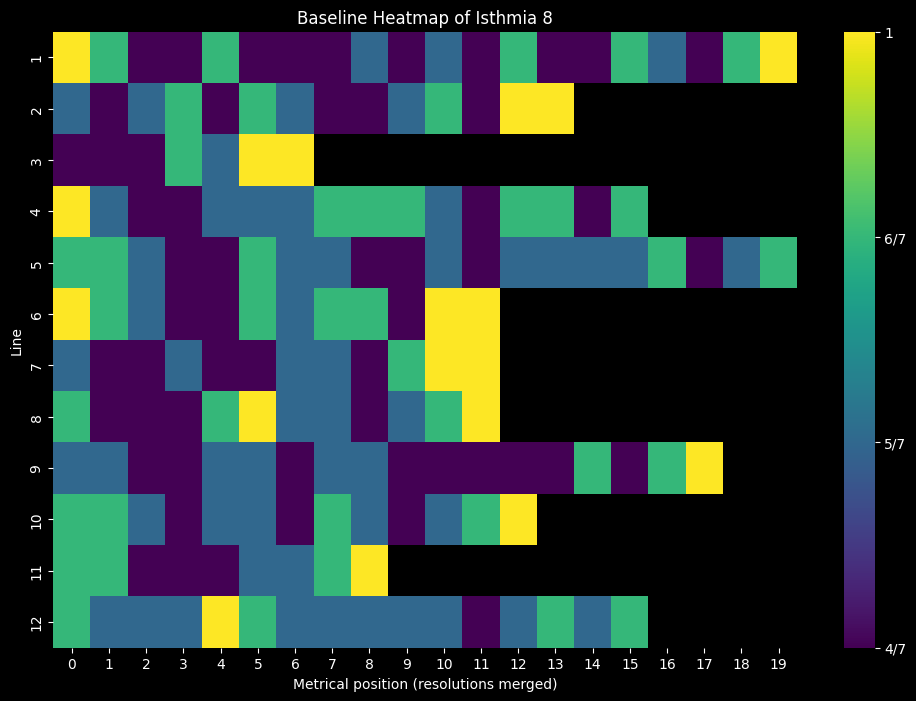

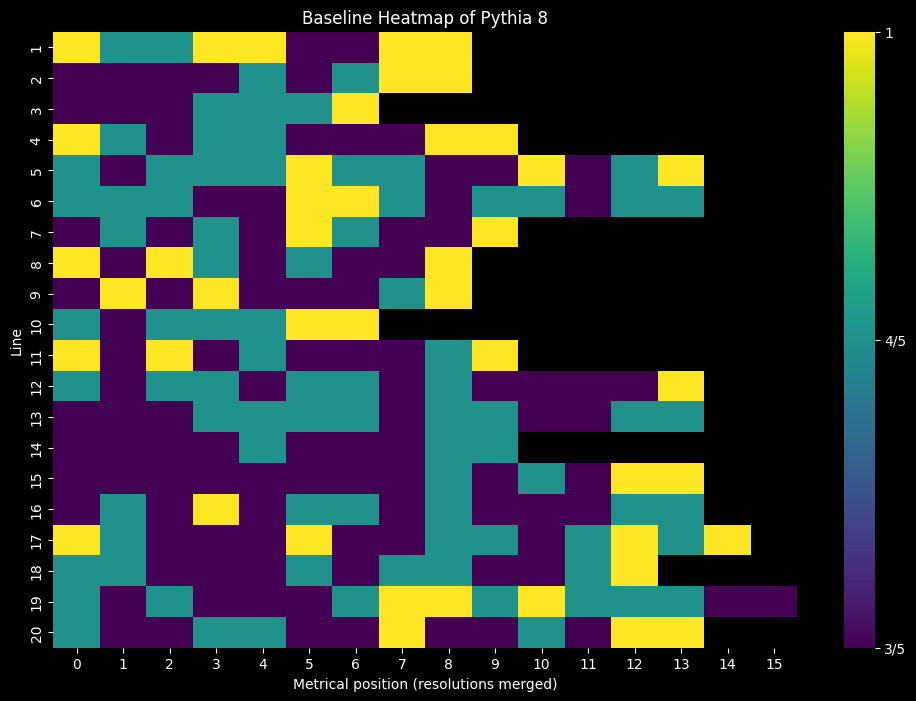

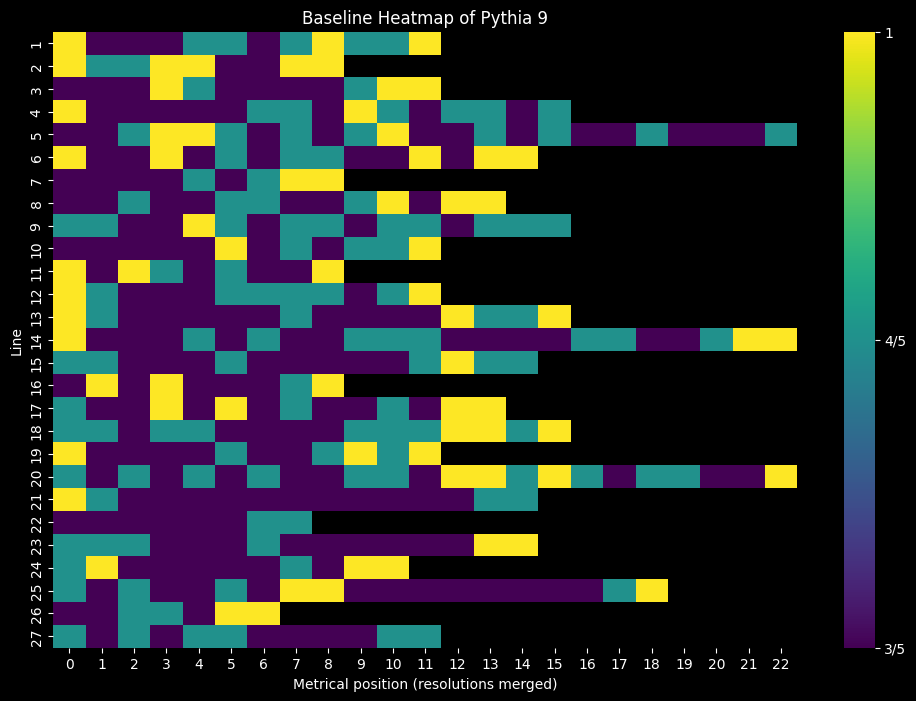

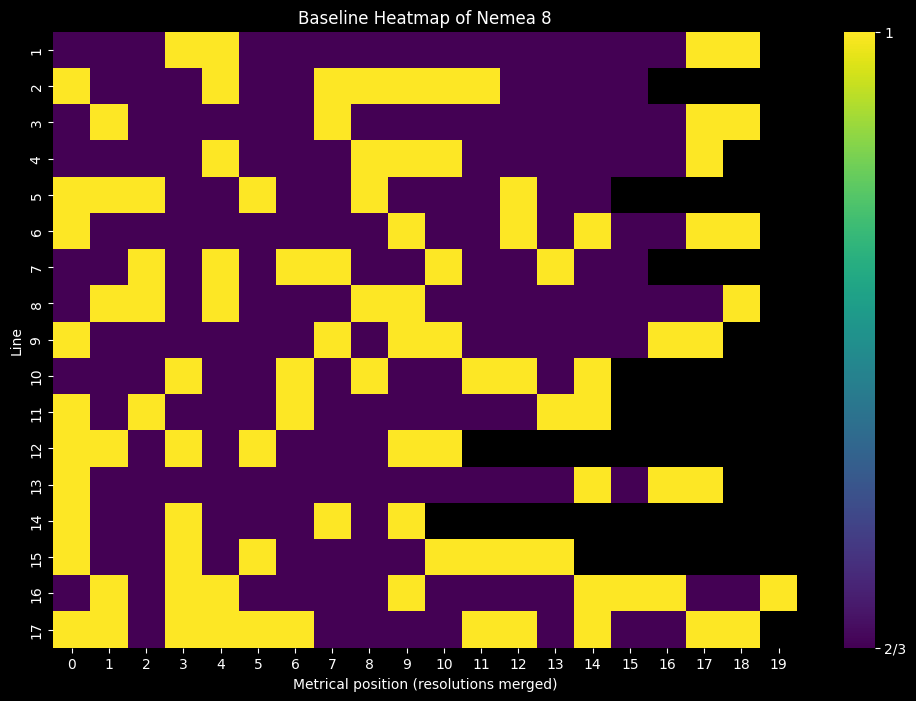

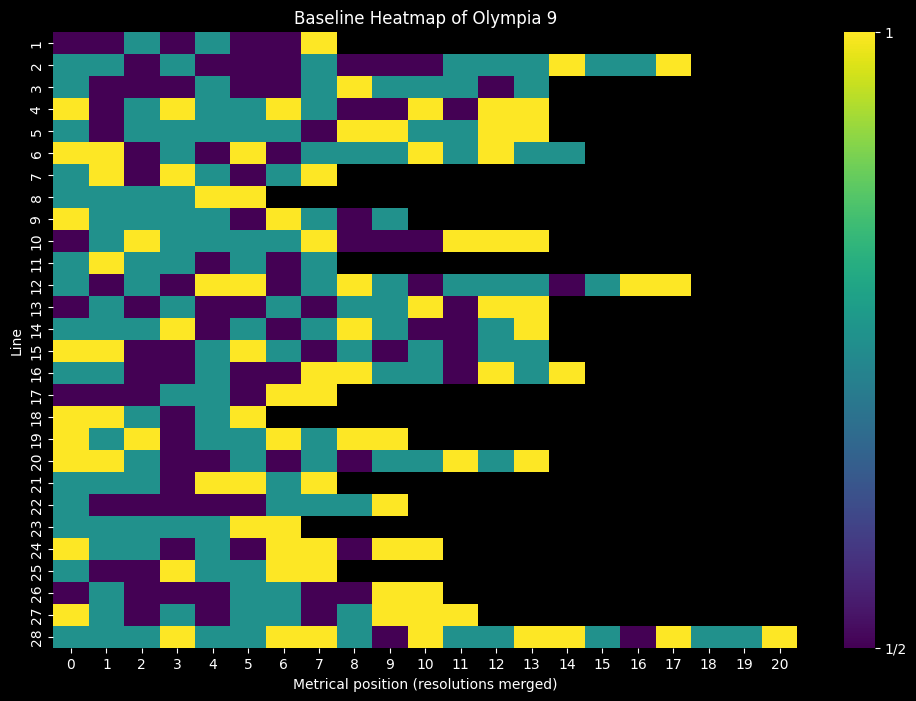

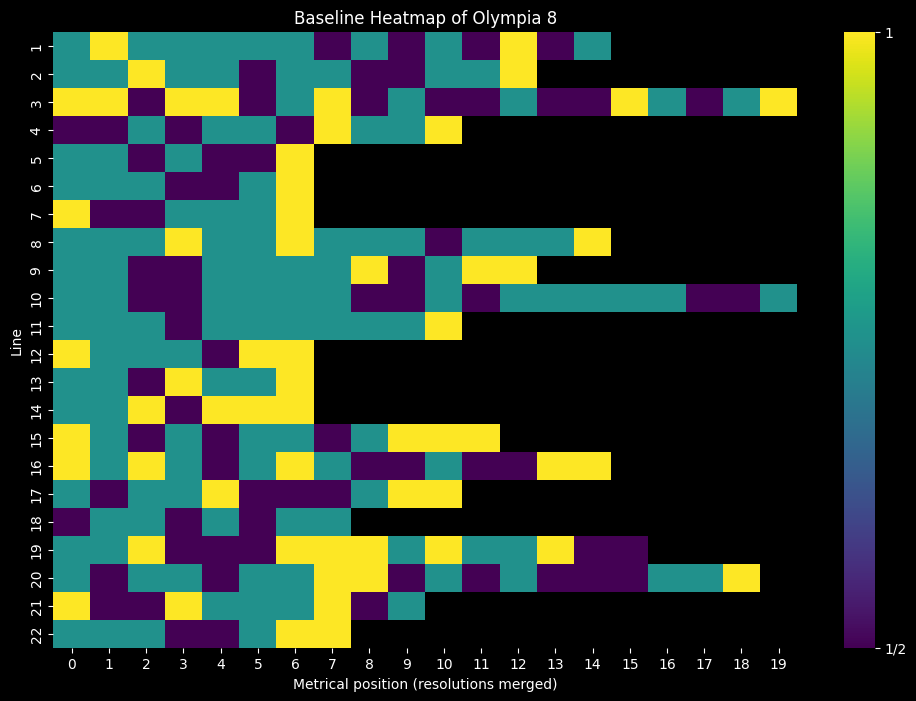

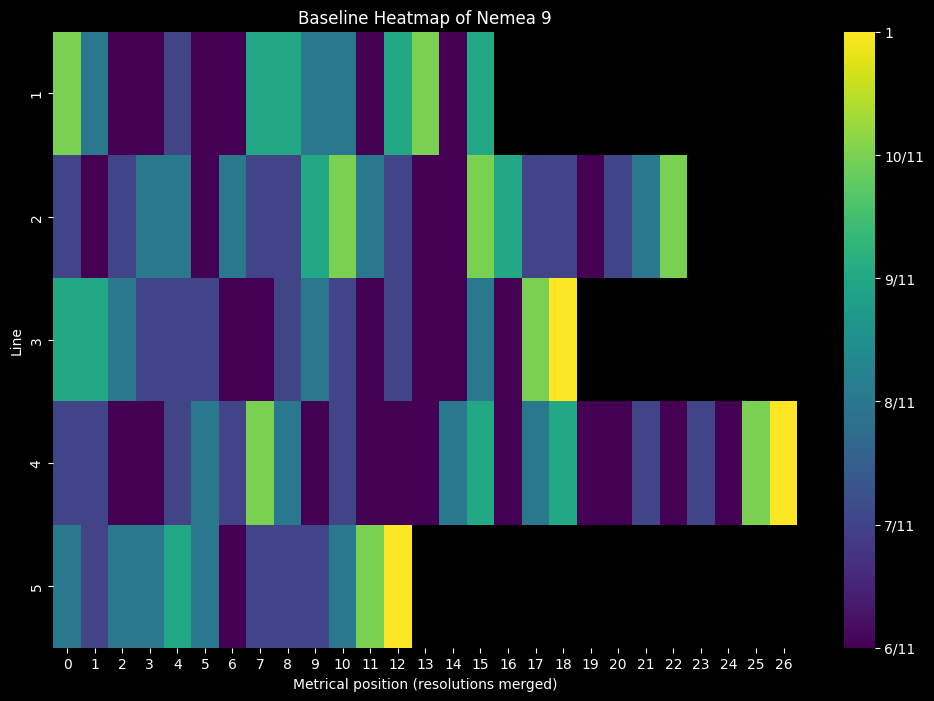

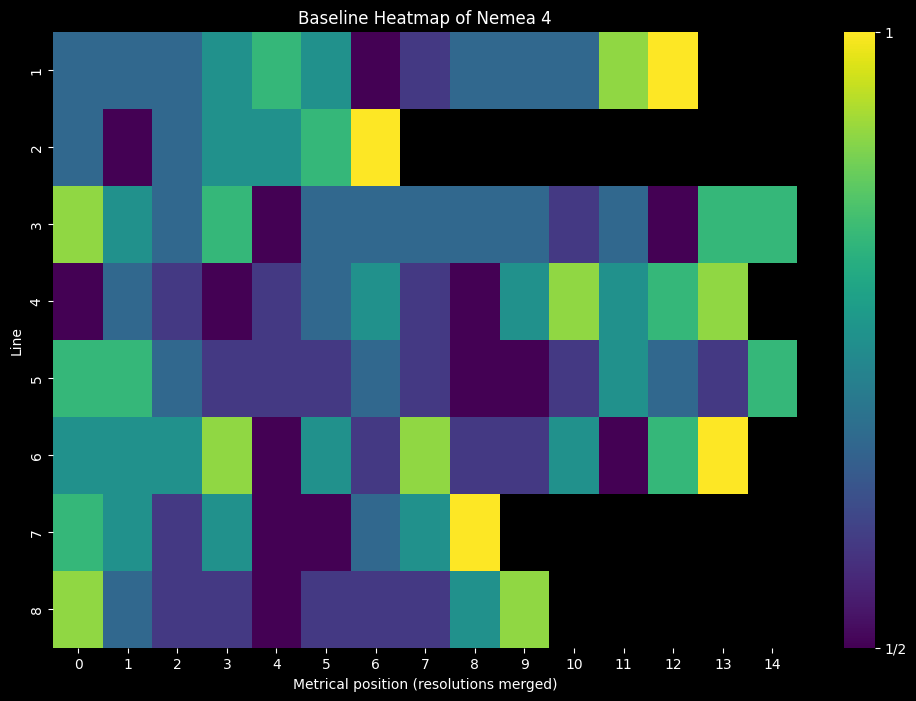

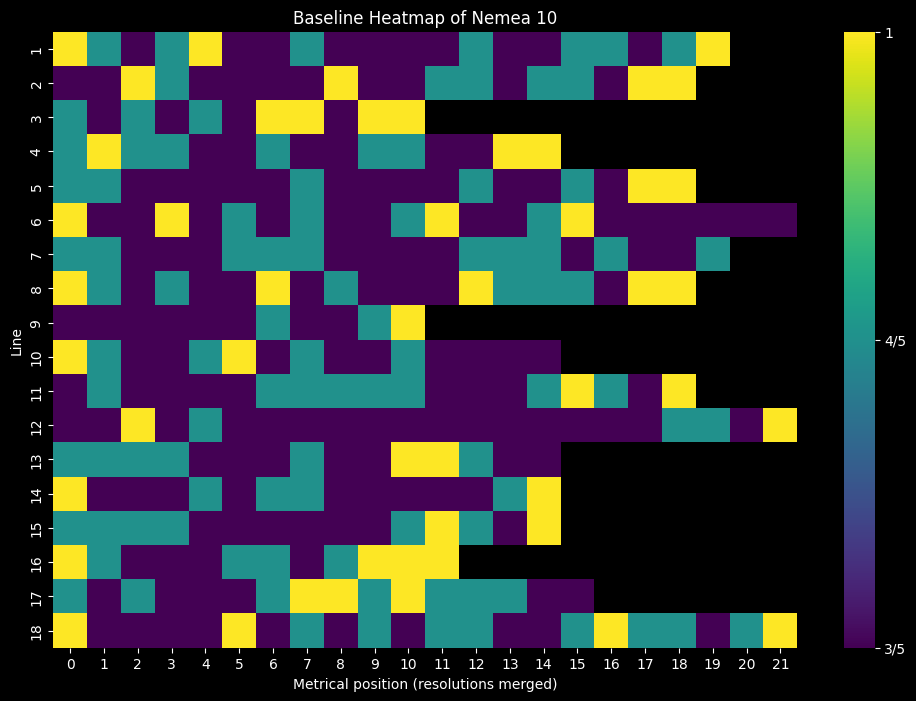

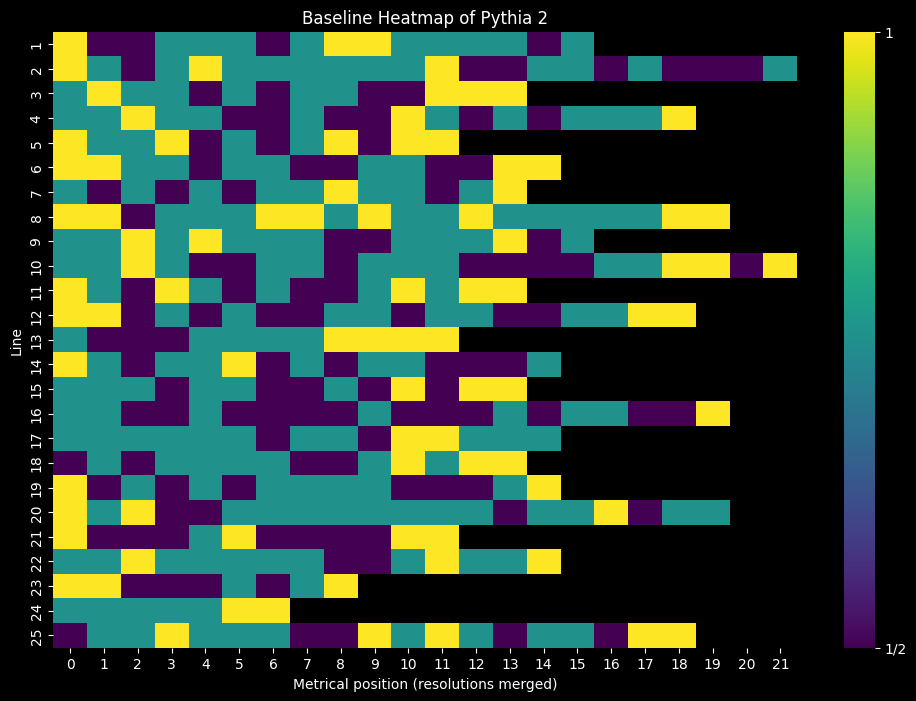

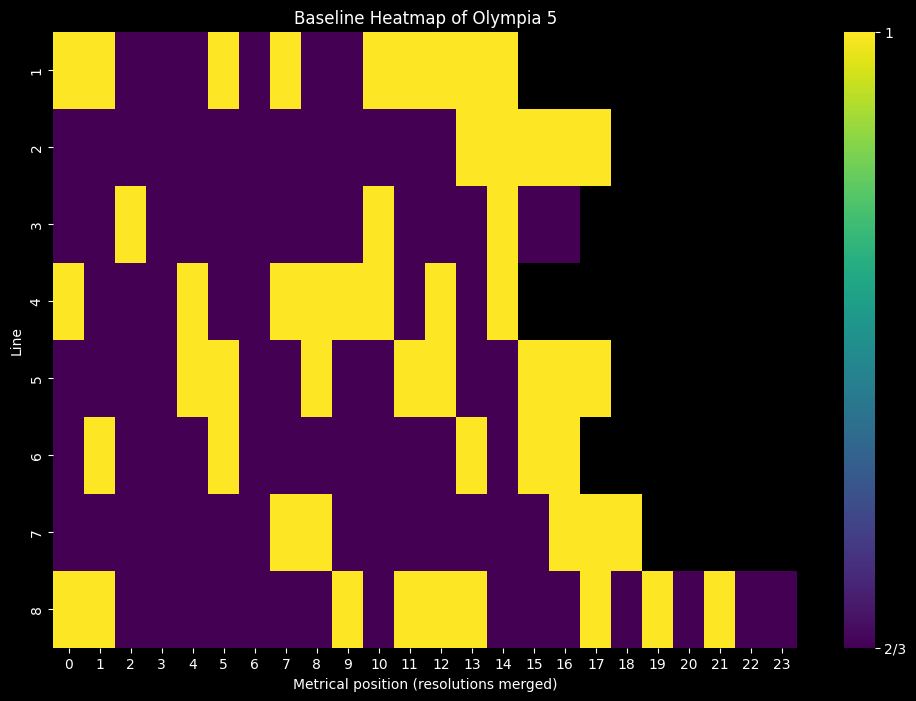

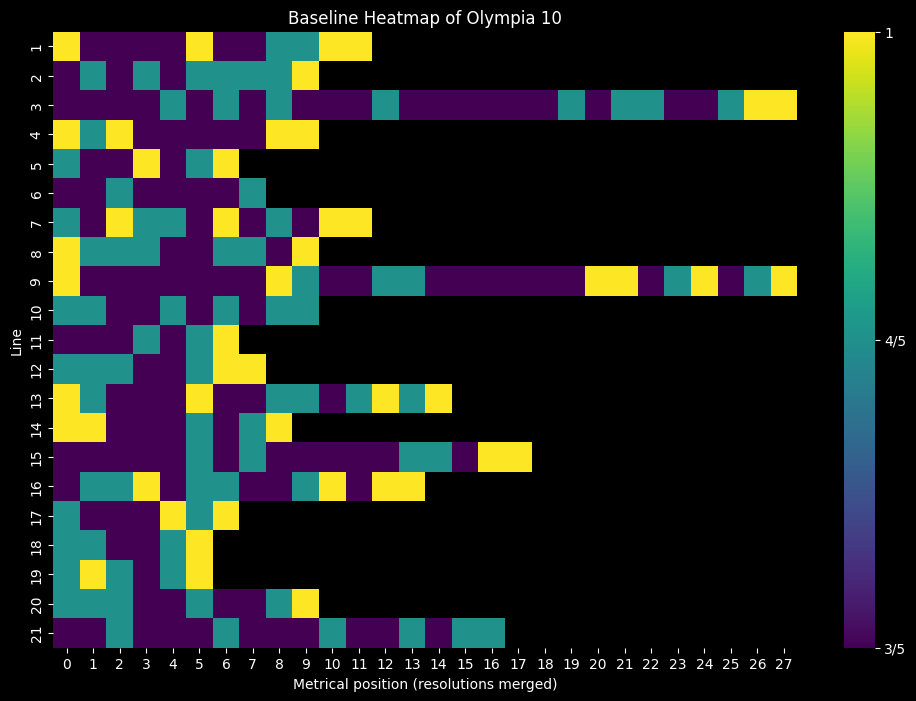

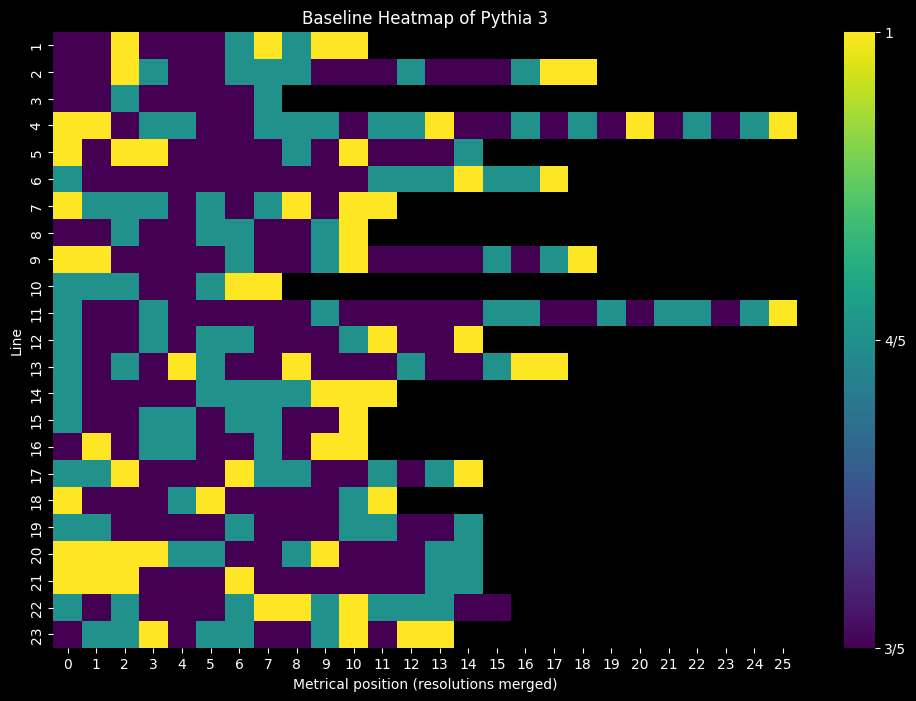

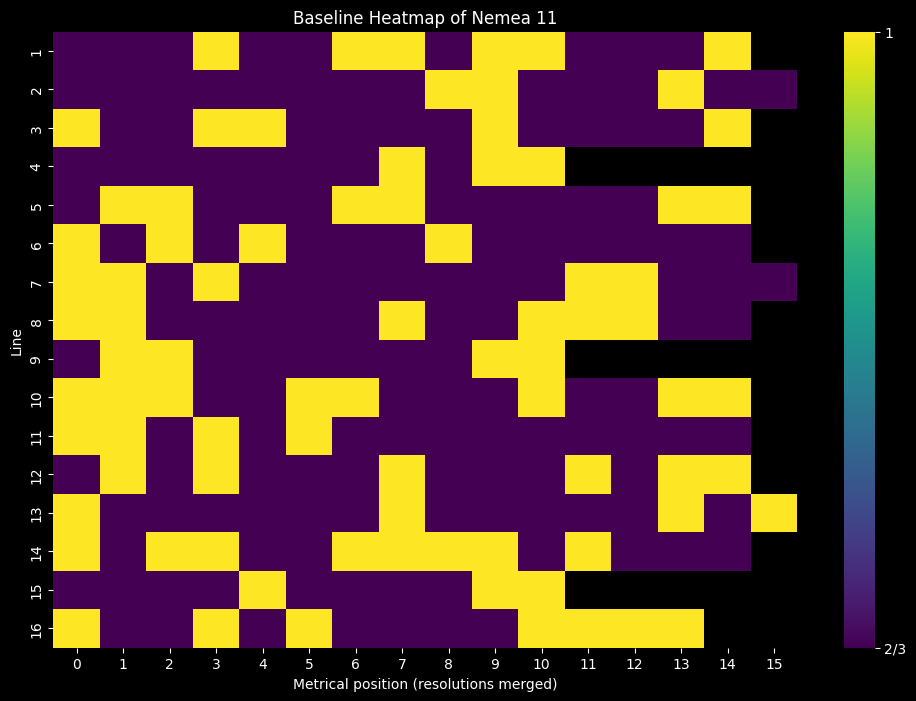

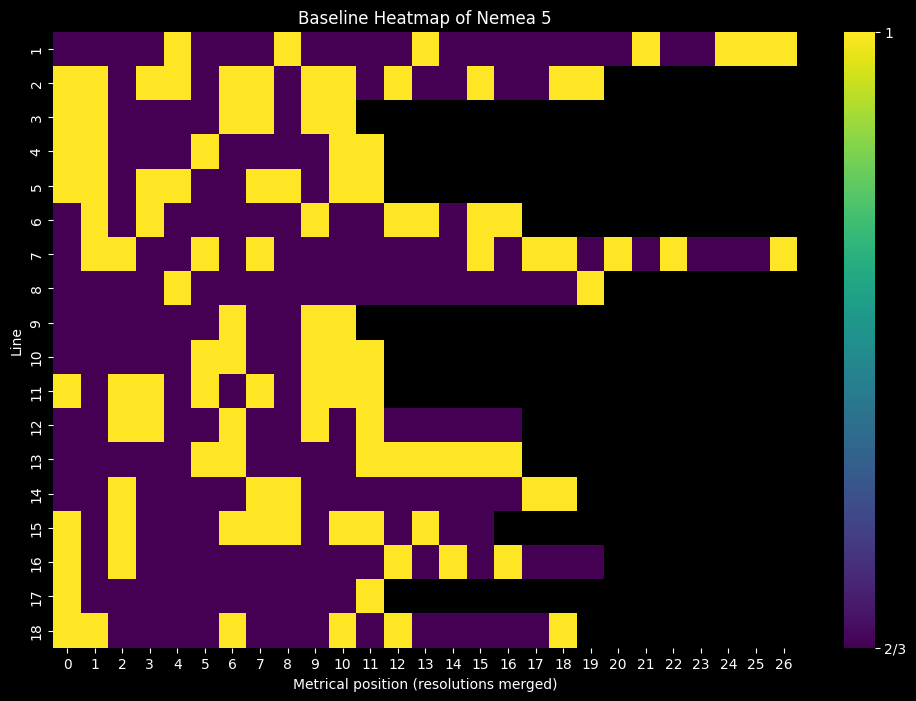

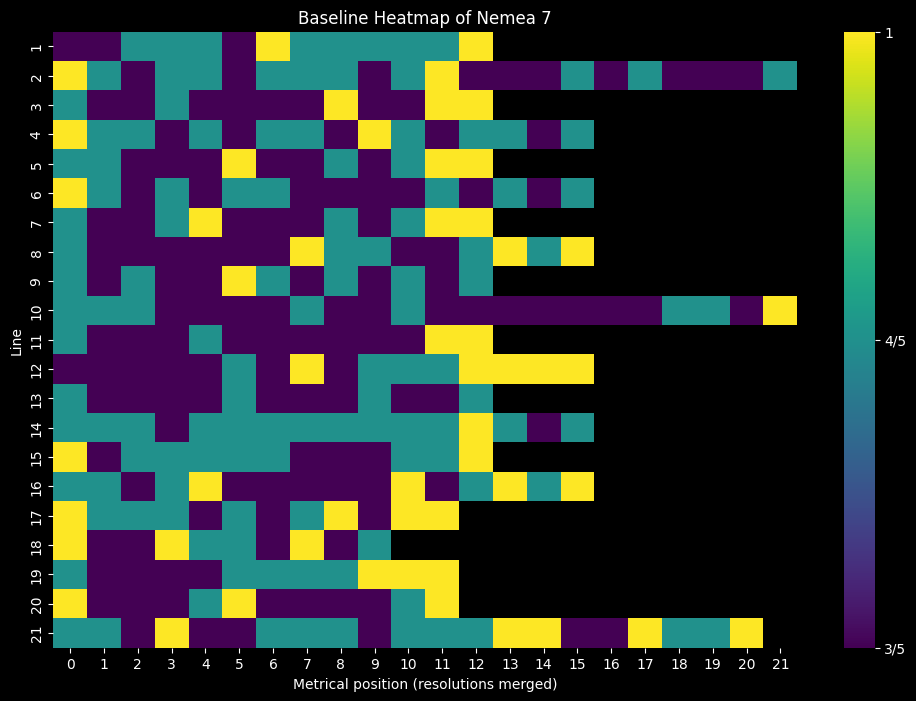

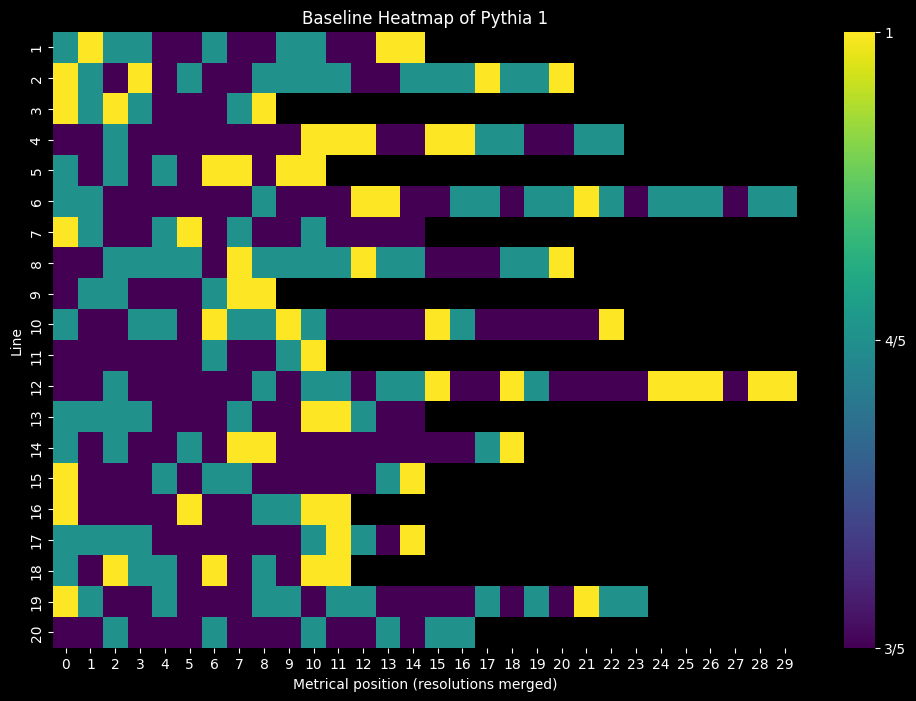

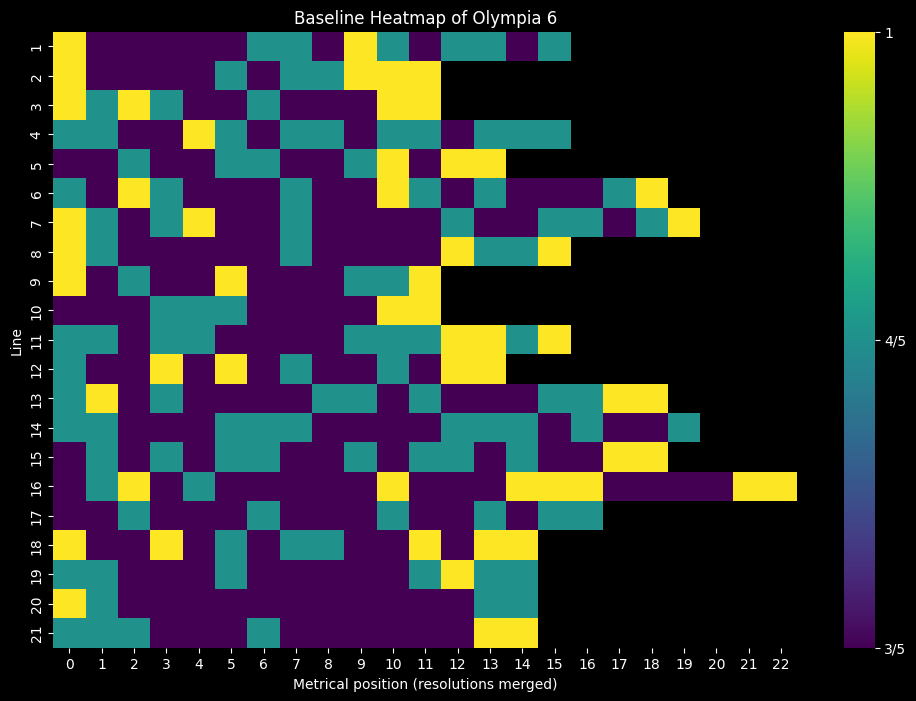

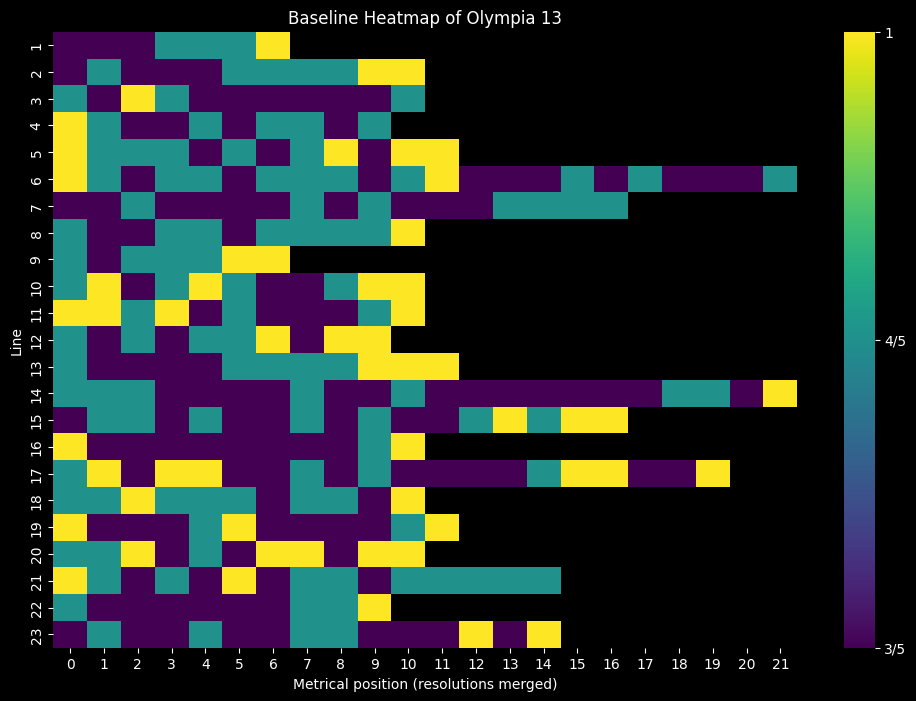

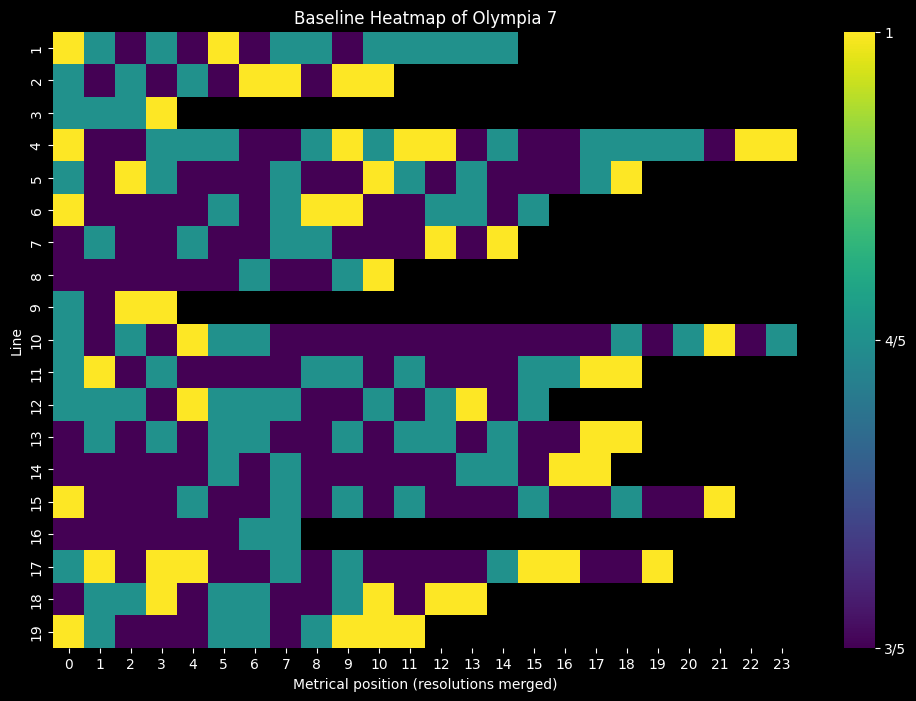

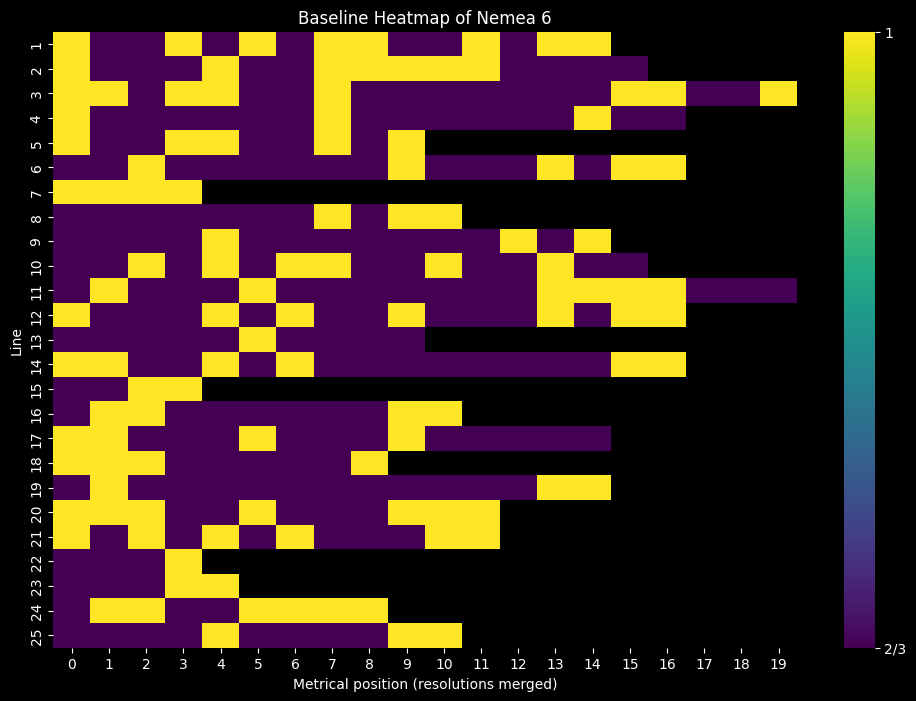

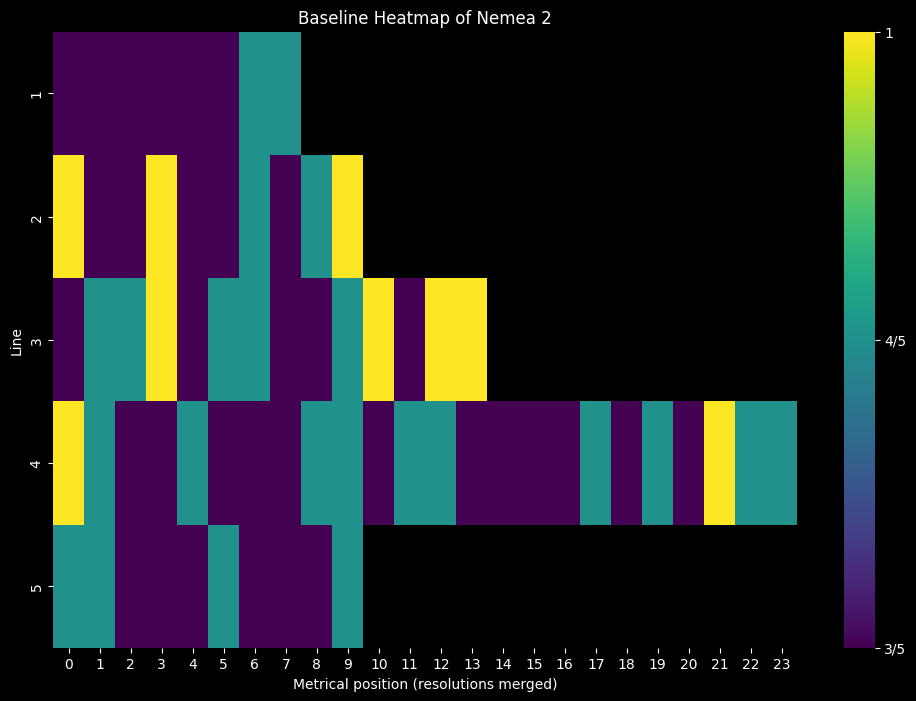

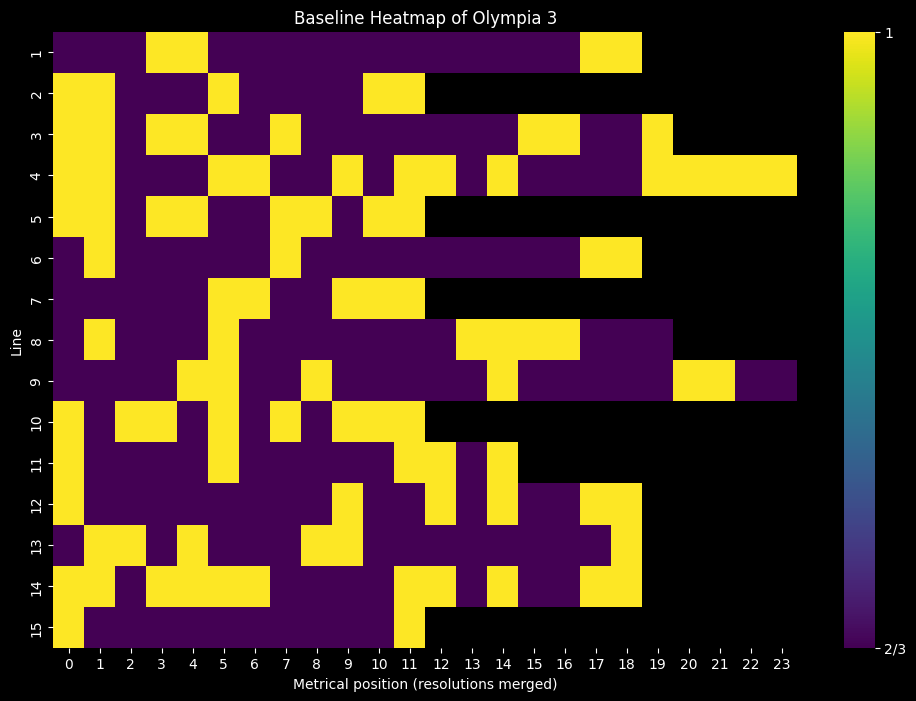

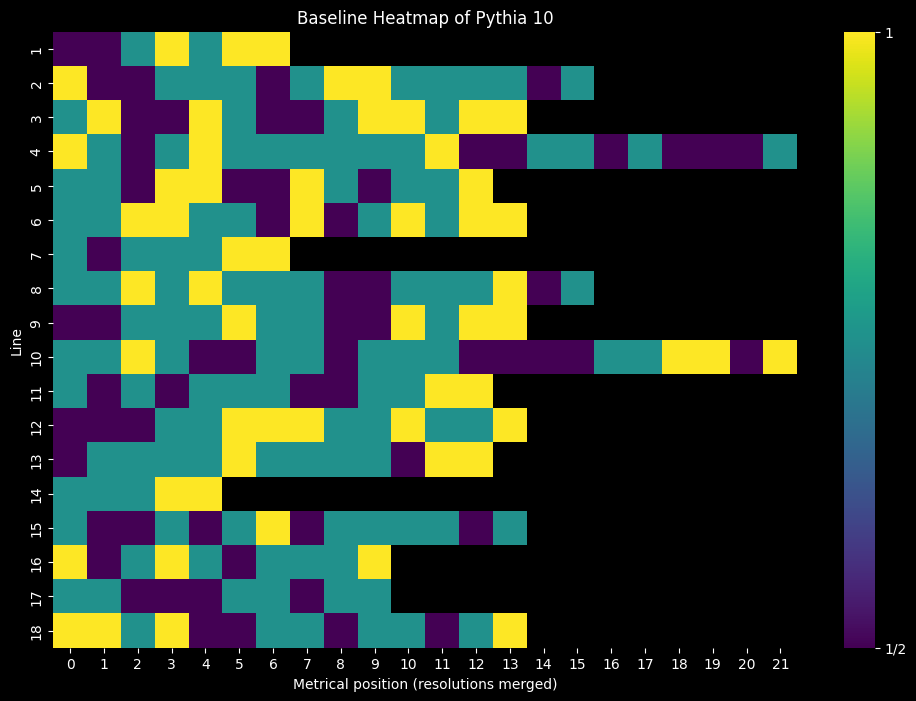

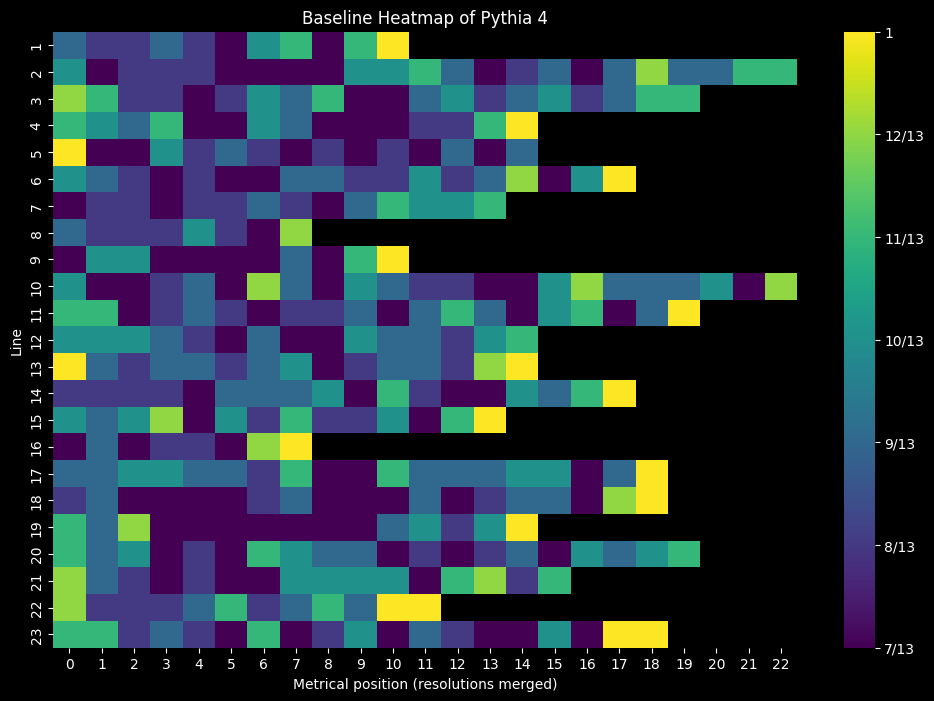

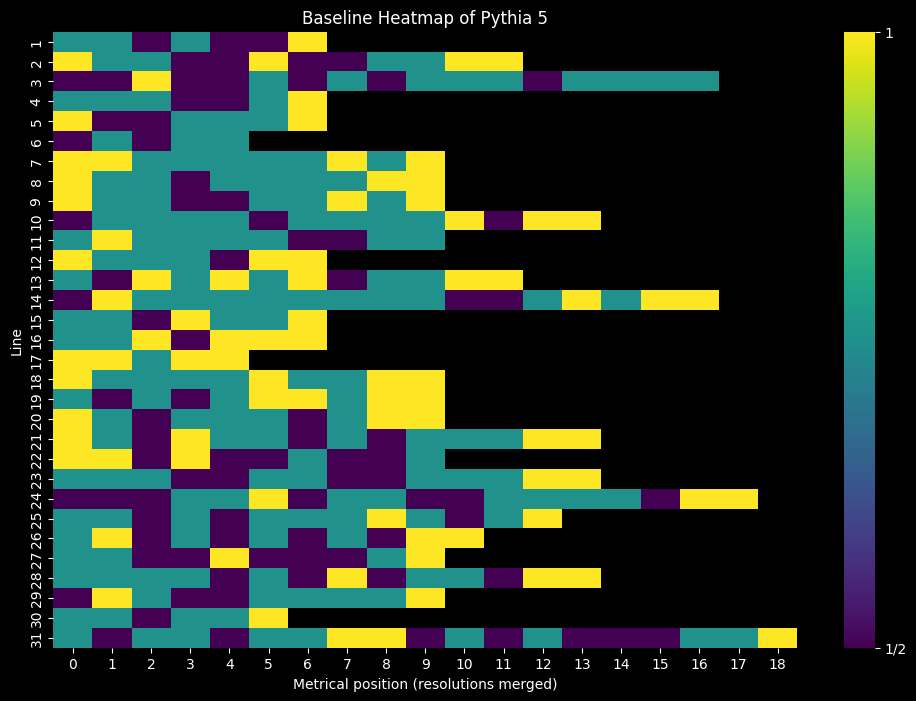

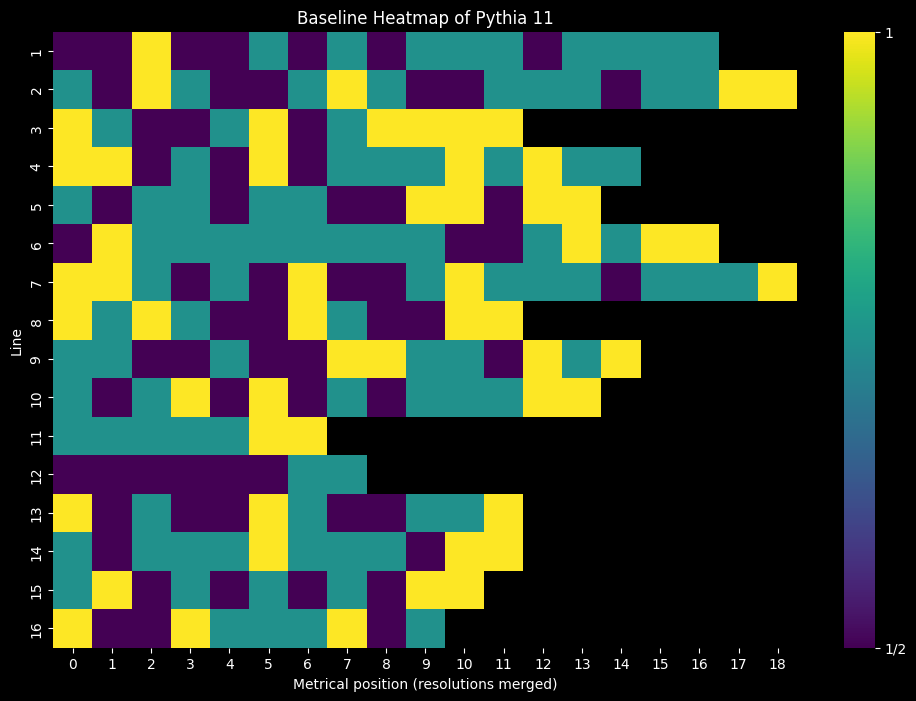

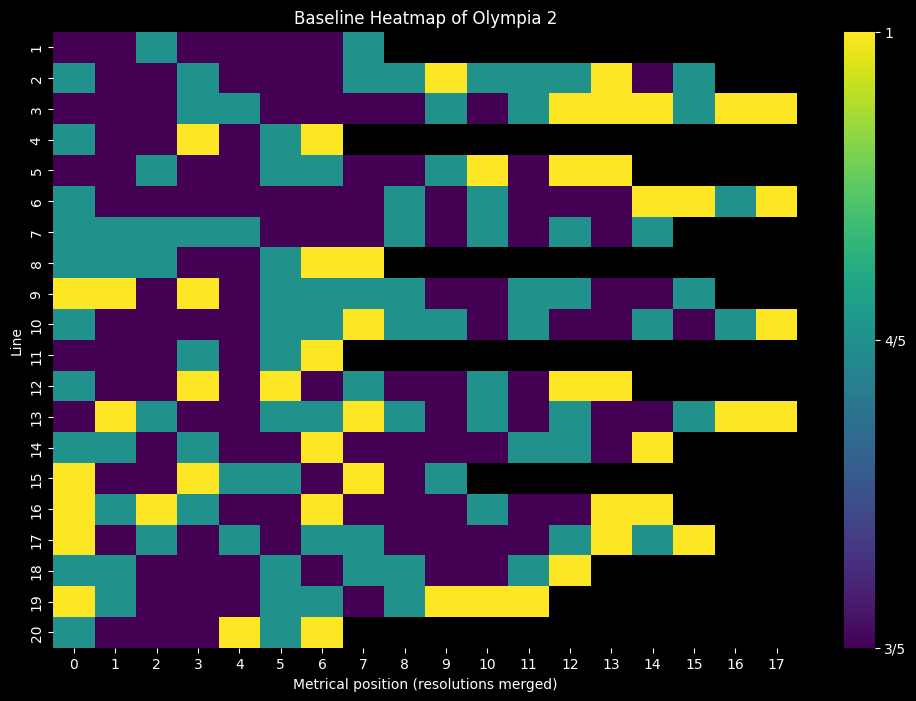

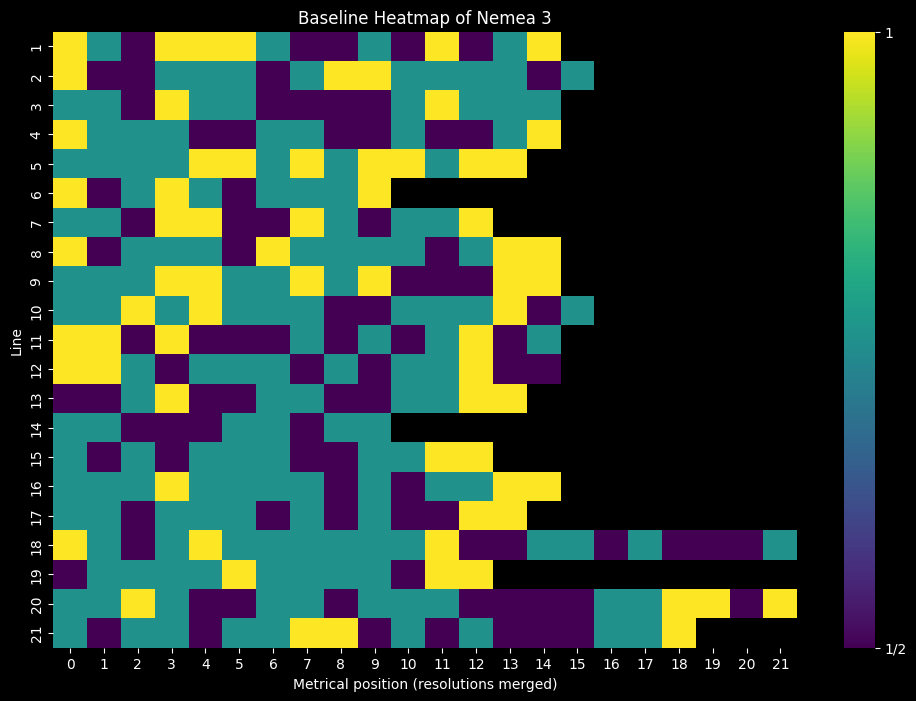

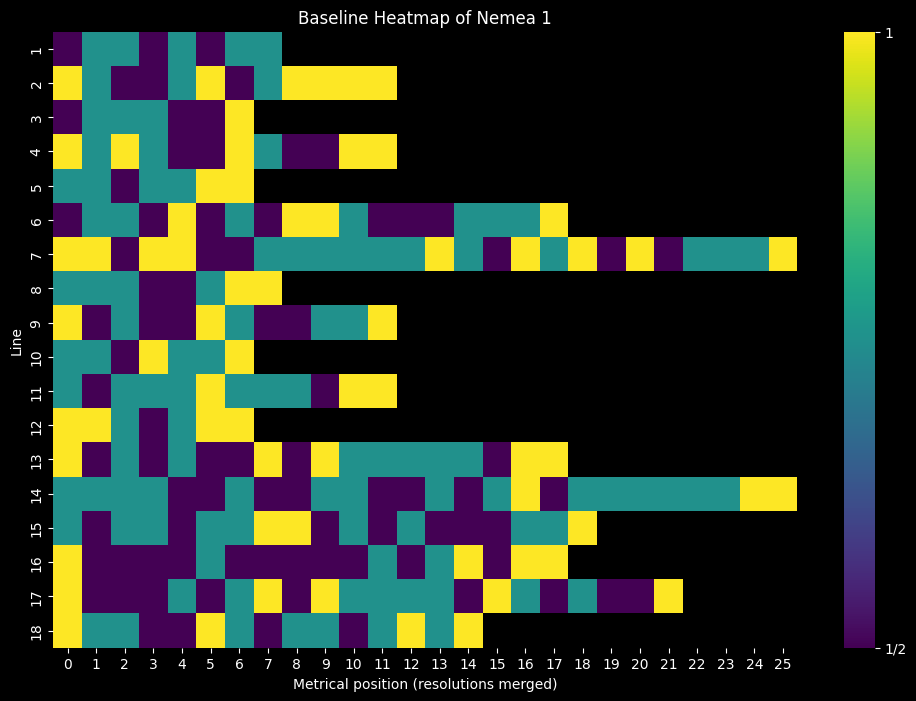

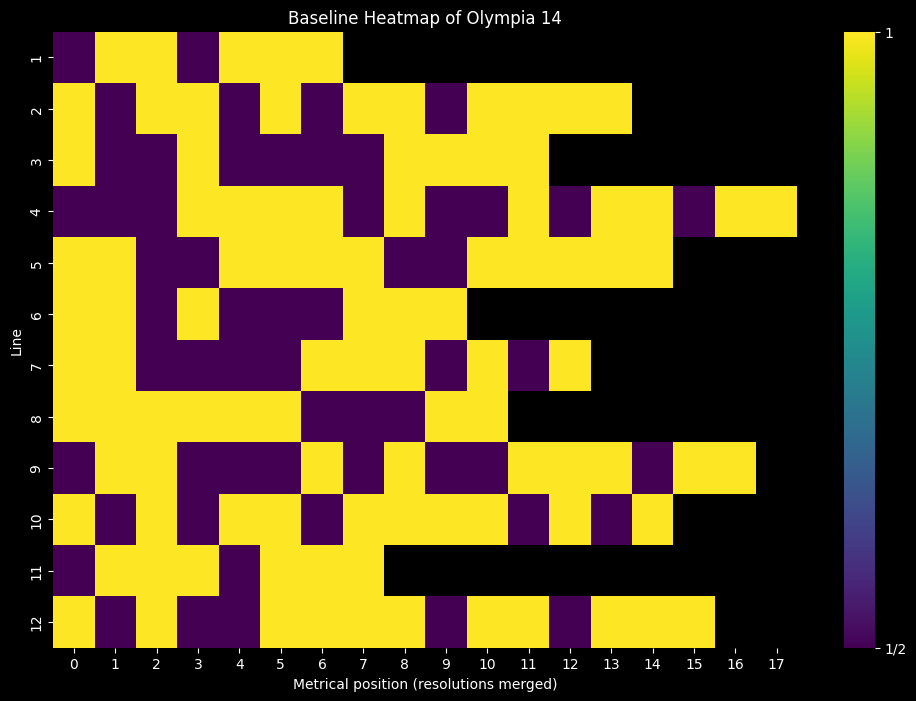

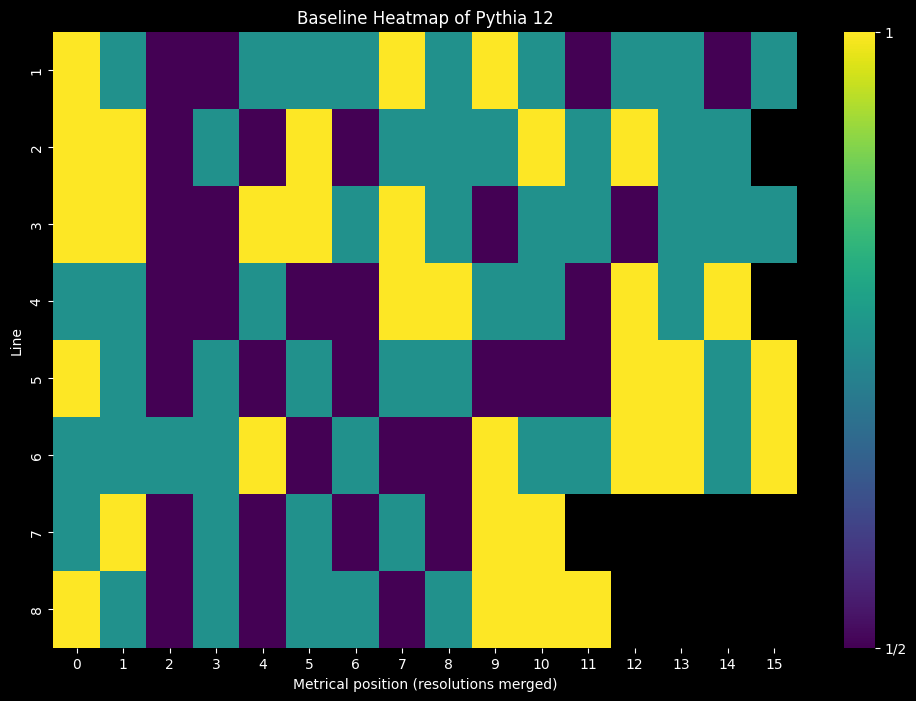

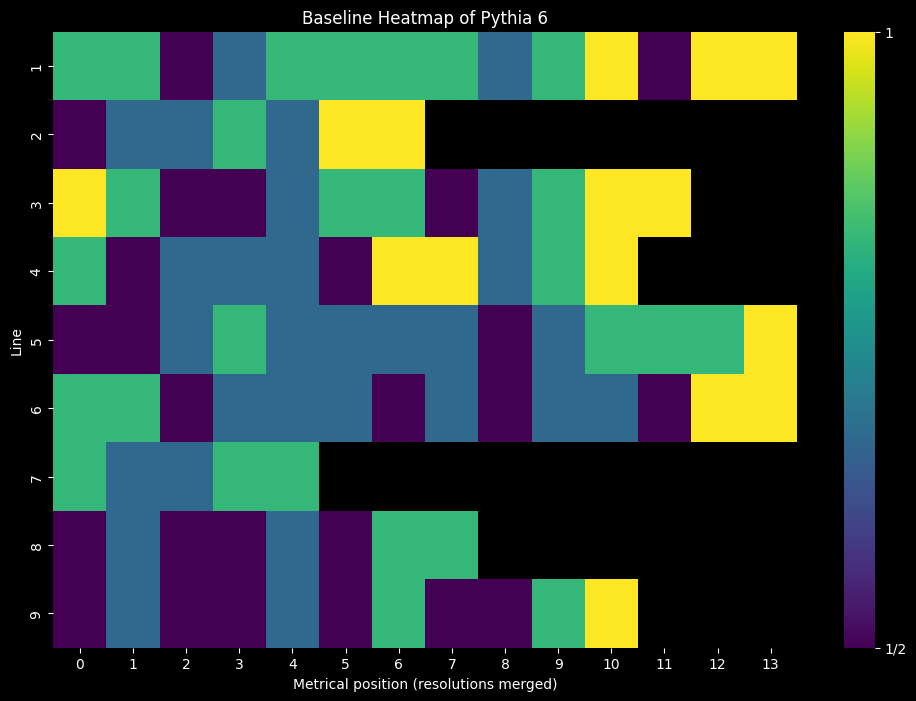

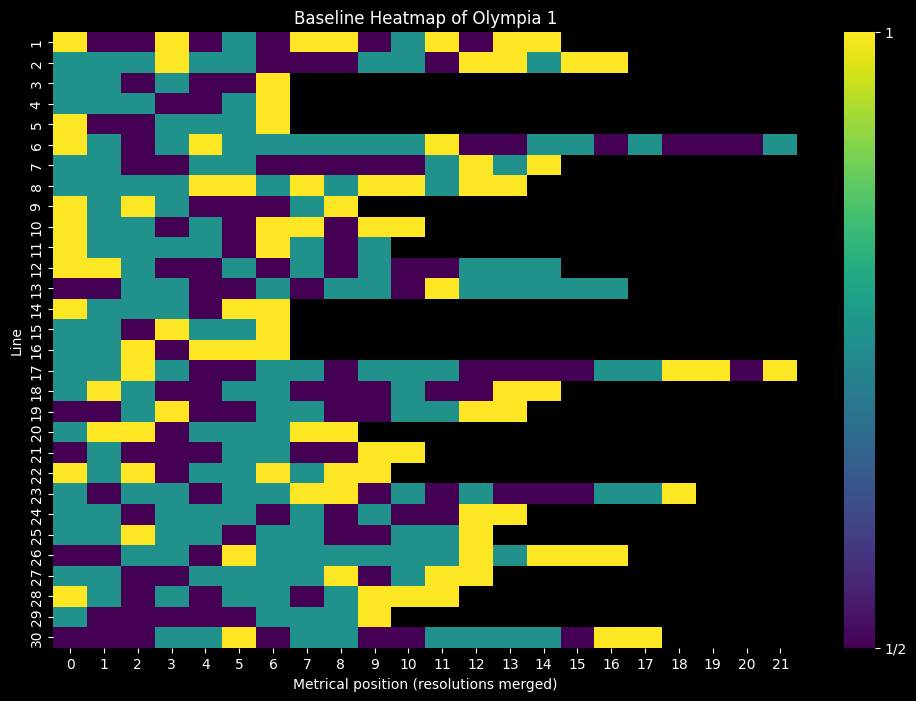

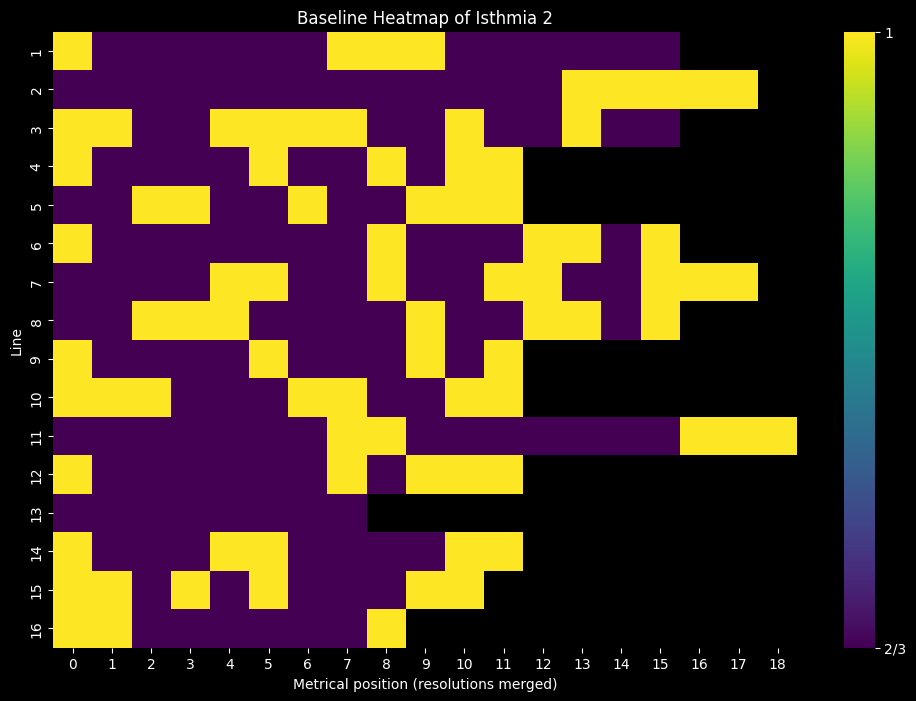

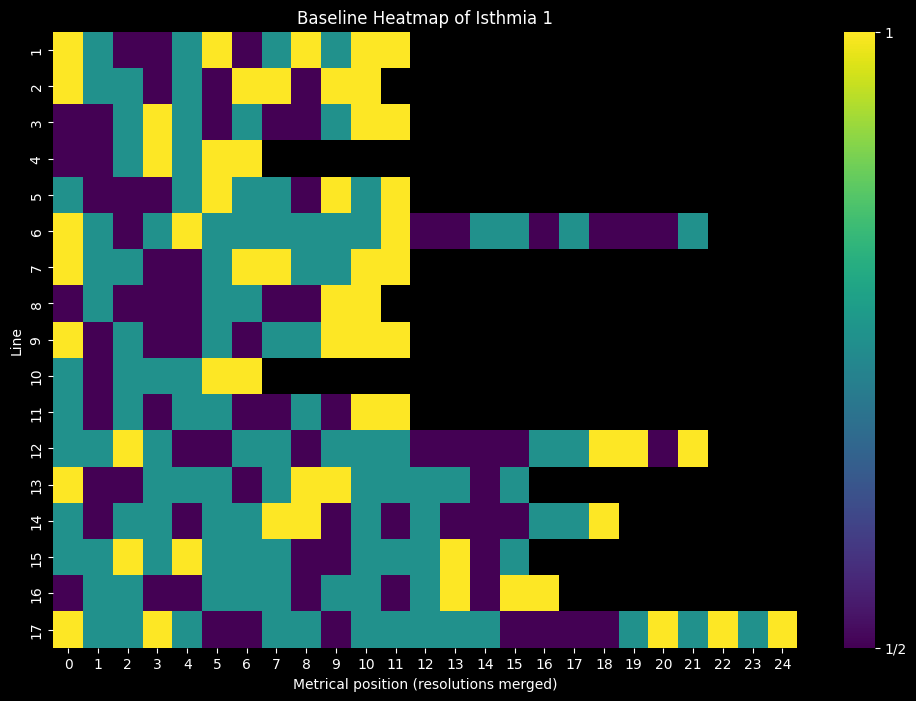

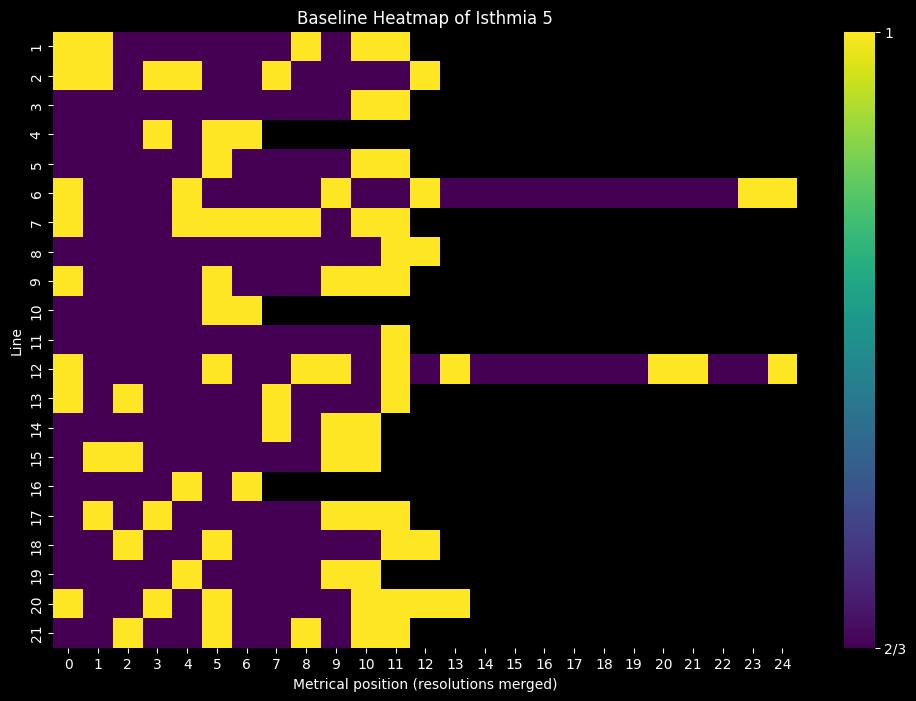

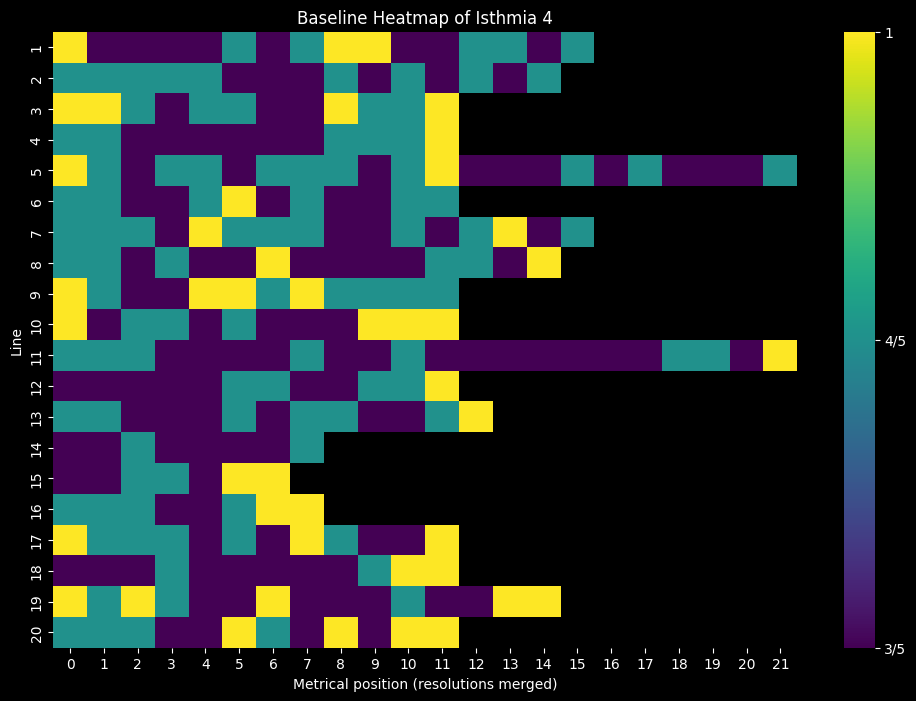

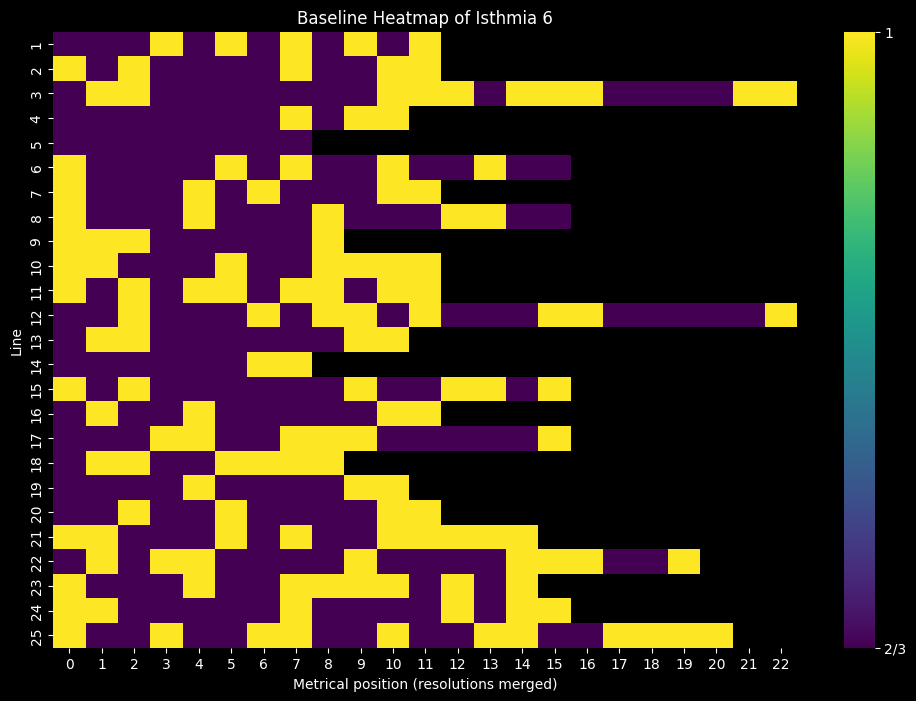

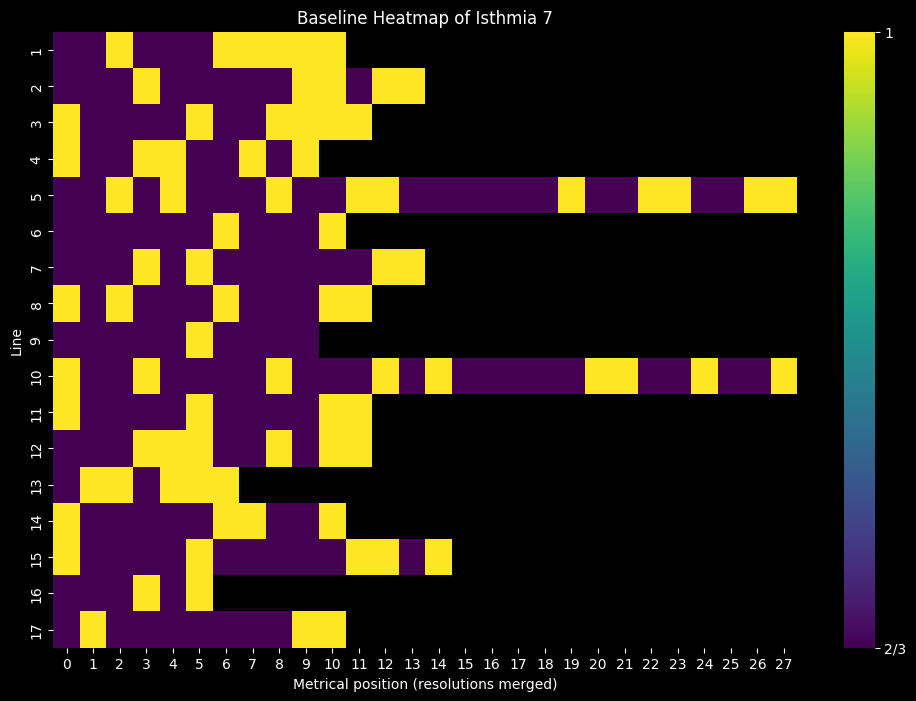

In [ ]:
import os
from tqdm import tqdm

from src.utils.utils import get_canticum_ids
from heatmaps import canticum_with_at_least_two_strophes, make_one_heatmap

###### SETTINGS #######

responding_unit = "triads"  # "triads", "strophes"
overlay = False
dark = not overlay

#######################

in_folder = f"data/compiled/baselines/{responding_unit}/prose/"
out_folder = f"media/heatmaps/{responding_unit}/baselines/"

xmls = os.listdir(in_folder)
xmls = [f for f in xmls if f.endswith(".xml")]

for xml_file in xmls:

    xml_path = os.path.join(in_folder, xml_file)

    responsion_attributes = get_canticum_ids(xml_path)

    for responsion_attribute in tqdm(responsion_attributes):
        if not canticum_with_at_least_two_strophes(xml_path, responsion_attribute):
            print(f"Skipping {responsion_attribute} in {group[1]} (less than 2 strophes).")
            continue

        print(f"Generating baseline heatmap for {responsion_attribute}...")

        group = ""
        if responsion_attribute.startswith("ol"):
            group = "Olympia"
        elif responsion_attribute.startswith("py"):
            group = "Pythia"
        elif responsion_attribute.startswith("ne"):
            group = "Nemea"
        elif responsion_attribute.startswith("is"):
            group = "Isthmia"

        number = int(responsion_attribute[2:])

        if responding_unit == "strophes":
            title = f"Baseline Heatmap of {group} {number} (Strophic-Antistrophic)"
        else:
            title = f"Baseline Heatmap of {group} {number}"
        make_one_heatmap(xml_path, out_folder, responsion_attribute, title, representative_strophe=1, save=True, show=False, dark_mode=dark, text_overlay=overlay)

print(len(os.listdir(out_folder)))

## Gifs

In [10]:
from PIL import Image

png_files = [
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp.png",
    "media/plots/heatmap_notext_invertedcolours_pythia_4_comp_baseline.png"
]

frames = [Image.open(f).convert("P", palette=Image.ADAPTIVE, colors=256) for f in png_files]

frames[0].save(
    "baseline_animated_py04_PIL.gif",
    save_all=True,
    append_images=frames[1:],
    duration=500,  # ms
    loop=0,
    optimize=False
)